In [1]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image and directories
import cv2
import os

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow import keras

In [3]:
import pandas as pd

data = pd.read_csv('EmbeddingData_C3_9528.csv')
data.describe(include='all')

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment
count,36723.000000,36723,36723,36723,36723,36723,36723,36723,36723,36723,36723,36723.000000,36723.000000,36723.000000,36723.000000,36723.000000,36723.000000,36723.000000
unique,NaN,4748,4748,15,15,979,979,33,33,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E01001412,Enfield 004C,6a,Inner city cosmopolitan,E02006789,Bromley 042,E09000006,Bromley,4a1r,Ethnically Diverse Metropolitan Living,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,363,363,9041,9041,462,462,3546,3546,19492,19492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36922.291997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117011,0.077774,12.995546,-0.578348,0.211408,32.301551,25.645519
std,16424.963636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072170,0.043844,10.240666,0.718902,0.588681,10.587134,10.729679
min,2619.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006000,0.003000,0.013000,-3.215000,-2.354000,6.910000,5.450000
25%,24161.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057000,0.043000,4.481000,-1.089000,-0.199000,24.283000,17.527000
50%,37072.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103000,0.067000,10.925000,-0.563000,0.221000,31.270000,24.350000
75%,50001.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163000,0.102000,19.086000,-0.039000,0.627000,39.506000,31.997000


In [4]:
ImagePath = 'LIDAR/'
data['path'] = [os.path.join(ImagePath, 'LIDAR_'+str(i) + '.png') for i in data['id']]
data.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment,path
0,48552,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902,LIDAR/LIDAR_48552.png
1,46571,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902,LIDAR/LIDAR_46571.png
2,21161,E01000487,Brent 006E,7b,Young ethnic communities,E02000098,Brent 006,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,0.123,0.068,7.192,-0.782,0.109,40.432,21.233,LIDAR/LIDAR_21161.png
3,26188,E01004572,Wandsworth 016A,6a,Inner city cosmopolitan,E02000938,Wandsworth 016,E09000032,Wandsworth,5a1r,London Cosmopolitan,0.142,0.090,8.750,-0.328,1.062,35.035,21.583,LIDAR/LIDAR_26188.png
4,46276,E01033320,Lewisham 017E,6a,Inner city cosmopolitan,E02000669,Lewisham 017,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,0.125,0.105,7.185,-0.143,0.133,32.410,38.222,LIDAR/LIDAR_46276.png


Since our topic is the education, we might want to drop other columns

In [5]:
data=data.drop(columns=['employment','income','health','crime','barriers','living_environment'])

In [6]:
data.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,education,path
0,48552,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,7.632,LIDAR/LIDAR_48552.png
1,46571,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,7.632,LIDAR/LIDAR_46571.png
2,21161,E01000487,Brent 006E,7b,Young ethnic communities,E02000098,Brent 006,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,7.192,LIDAR/LIDAR_21161.png
3,26188,E01004572,Wandsworth 016A,6a,Inner city cosmopolitan,E02000938,Wandsworth 016,E09000032,Wandsworth,5a1r,London Cosmopolitan,8.750,LIDAR/LIDAR_26188.png
4,46276,E01033320,Lewisham 017E,6a,Inner city cosmopolitan,E02000669,Lewisham 017,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,7.185,LIDAR/LIDAR_46276.png


### Resnet

In [7]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 3080 (UUID: GPU-b7f4a8b3-7c4e-a25f-572e-1009f12e32d8)


In [8]:
# Parameters
ImageSize = (224,224)
BatchSize = 64

In [9]:
# Import base model. Using ResNet50v2.
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

# Import model with input layer
base_model = ResNet50V2(weights = 'imagenet',     # The weights from the ImageNet competition
                      include_top = False,       # Do not include the top layer, which classifies.
                      input_shape= (224, 224, 3) # Input shape. Three channels.
                      )

In [10]:
# Set the base model to untrainable.
base_model.trainable = False

In [11]:
# Create the full model using the Model API

# Input layer
inputs = keras.Input(shape=ImageSize + (3,),
                        name = 'image_only_input')

# Add the ResNet model, setting it to be untrainable. 
# First we store it on a temporary variable.
x = base_model(inputs, training=False)

# Flatten to make it the same size as the original model
x = Flatten()(x)

# Now we actually add it to a layer. Note the way of writing it.
x = Dense(128, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.6)(x)

# Add final output layer.
outputs = Dense(1, activation='linear')(x)

# Create the complete model object
ImageOnlyModel = keras.Model(inputs, outputs)

In [12]:
# This is what the model looks like now.
ImageOnlyModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_only_input (InputLayer [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [13]:
# Compiling the model! Note the learning rate.
opt = optimizers.Adam(learning_rate=1e-6,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-4 / 100    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
ImageOnlyModel.compile(loss=keras.losses.MeanSquaredError(), # This is NOT a classification problem!
                      optimizer=opt
                       )

In [14]:
layer_names=[layer.name for layer in ImageOnlyModel.layers]

In [15]:
layer_names

['image_only_input',
 'resnet50v2',
 'flatten',
 'dense',
 'dropout',
 'dense_1',
 'dropout_1',
 'dense_2']

In [16]:
print([layer.name for layer in ImageOnlyModel.get_layer('resnet50v2').layers])

['input_1', 'conv1_pad', 'conv1_conv', 'pool1_pad', 'pool1_pool', 'conv2_block1_preact_bn', 'conv2_block1_preact_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_pad', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_out', 'conv2_block2_preact_bn', 'conv2_block2_preact_relu', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_pad', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_out', 'conv2_block3_preact_bn', 'conv2_block3_preact_relu', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_pad', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'max_pooling2d', 'conv2_block3_3_conv', 'conv2_block3_out', 'conv3_block1_preact_bn', 'conv3_block1_preact_relu', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_

In [17]:
# Create a train / test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, 
                               test_size = 0.3,
                               random_state = 251238783)

In [18]:
# Define parameters

target_size = (224, 224)
batch_size = 64

# Define generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  rescale=None,                         # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=True,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # ResNet expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=None,                        # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  )

# Point to the data and **give the targets**. Note the "raw" class_mode
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',  # Look from root directory
                                                    x_col='path',   # Path to images
                                                    y_col='education',  # Target
                                                    target_size=target_size, # Same as last lab
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col='education',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = test_datagen.flow_from_dataframe(test,
                                                  directory='.',
                                                  x_col='path',
                                                  y_col='education',
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='raw',
                                                  interpolation="bilinear"
                                                  )

Found 20565 validated image filenames.
Found 5141 validated image filenames.
Found 11017 validated image filenames.


In [19]:
# Number of epochs
epochs = 5

# Train!
ImageOnlyModel.fit(
                  train_generator,
                  epochs=epochs,
                  validation_data=validation_generator,
                  steps_per_epoch = 322, # Usually cases / batch_size = 3.
                  validation_steps = 81 # Number of validation steps. Again cases / batch_size = 1.
                  )

Epoch 1/5
322/322 [==============================] - 310s 938ms/step - loss: 226.2578 - val_loss: 122.1198
Epoch 2/5
322/322 [==============================] - 218s 678ms/step - loss: 158.8399 - val_loss: 103.5726
Epoch 3/5
322/322 [==============================] - 214s 665ms/step - loss: 153.1892 - val_loss: 99.6012
Epoch 4/5
322/322 [==============================] - 213s 662ms/step - loss: 148.0776 - val_loss: 96.8204
Epoch 5/5
322/322 [==============================] - 213s 662ms/step - loss: 142.5080 - val_loss: 95.0886


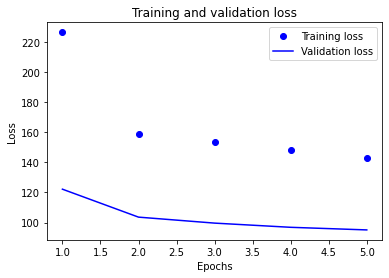

In [20]:
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
base_model.trainable = True

# Recompile as we changed things.
ImageOnlyModel.compile(loss=keras.losses.MeanSquaredError(), # This is NOT a classification problem!
                      optimizer=opt
                       )

ImageOnlyModel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_only_input (InputLayer [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

In [22]:
# Define callbacks
checkpoint_path='checkpoints/ImageOnlyModel.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)

my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=10),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
]

# Number of epochs
epochs = 20

# Train!
ImageOnlyModel.fit(
                  train_generator, # Pass the train generator
                  epochs=epochs, # Pass the epochs
                  validation_data=validation_generator, # Pass the validation generator
                  steps_per_epoch = 322,  # Usually cases / batch_size = 3.
                  validation_steps = 81,  # Number of validation steps. Again cases / batch_size = 3.
                  callbacks=my_callbacks # Add the callbacks
                  )

Epoch 1/20
322/322 [==============================] - 223s 674ms/step - loss: 133.0927 - val_loss: 80.4188
Epoch 2/20
322/322 [==============================] - 216s 672ms/step - loss: 129.6410 - val_loss: 78.4596
Epoch 3/20
322/322 [==============================] - 216s 670ms/step - loss: 126.9326 - val_loss: 78.5378
Epoch 4/20
322/322 [==============================] - 216s 669ms/step - loss: 125.0225 - val_loss: 76.6318
Epoch 5/20
322/322 [==============================] - 216s 670ms/step - loss: 123.4700 - val_loss: 76.4868
Epoch 6/20
322/322 [==============================] - 216s 669ms/step - loss: 122.3803 - val_loss: 77.0815
Epoch 7/20
322/322 [==============================] - 216s 670ms/step - loss: 120.5165 - val_loss: 75.0071
Epoch 8/20
322/322 [==============================] - 215s 669ms/step - loss: 119.4827 - val_loss: 76.0434
Epoch 9/20
322/322 [==============================] - 216s 670ms/step - loss: 117.3555 - val_loss: 74.8700
Epoch 10/20
322/322 [================

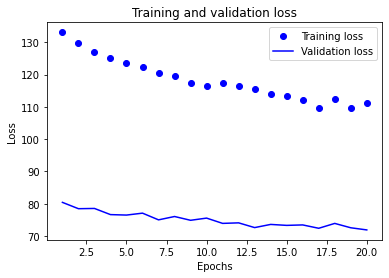

In [23]:
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
epochs = 10

# Train!
ImageOnlyModel.fit(
                  train_generator, # Pass the train generator
                  epochs=epochs, # Pass the epochs
                  validation_data=validation_generator, # Pass the validation generator
                  steps_per_epoch = 322,  # Usually cases / batch_size = 3.
                  validation_steps = 81,  # Number of validation steps. Again cases / batch_size = 3.
                  callbacks=my_callbacks # Add the callbacks
                  )

Epoch 1/10
322/322 [==============================] - 216s 671ms/step - loss: 109.1302 - val_loss: 71.0318
Epoch 2/10
322/322 [==============================] - 215s 668ms/step - loss: 108.2382 - val_loss: 71.8020
Epoch 3/10
322/322 [==============================] - 215s 668ms/step - loss: 108.6396 - val_loss: 71.6307
Epoch 4/10
322/322 [==============================] - 215s 669ms/step - loss: 108.6487 - val_loss: 71.6229
Epoch 5/10
322/322 [==============================] - 215s 669ms/step - loss: 108.3017 - val_loss: 72.4806
Epoch 6/10
322/322 [==============================] - 215s 668ms/step - loss: 105.5179 - val_loss: 71.1963
Epoch 7/10
322/322 [==============================] - 215s 668ms/step - loss: 106.1163 - val_loss: 72.2383
Epoch 8/10
322/322 [==============================] - 216s 671ms/step - loss: 105.5125 - val_loss: 71.1469
Epoch 9/10
322/322 [==============================] - 215s 668ms/step - loss: 104.5612 - val_loss: 72.2747
Epoch 10/10
322/322 [================

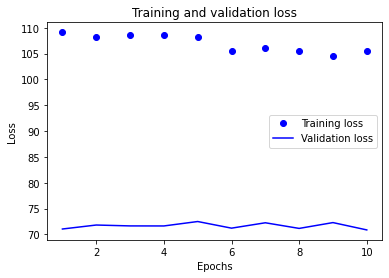

In [25]:
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
epochs = 10

# Train!
ImageOnlyModel.fit(
                  train_generator, # Pass the train generator
                  epochs=epochs, # Pass the epochs
                  validation_data=validation_generator, # Pass the validation generator
                  steps_per_epoch = 322,  # Usually cases / batch_size = 3.
                  validation_steps = 81,  # Number of validation steps. Again cases / batch_size = 3.
                  callbacks=my_callbacks # Add the callbacks
                  )

Epoch 1/10
322/322 [==============================] - 216s 670ms/step - loss: 103.5417 - val_loss: 71.3096
Epoch 2/10
322/322 [==============================] - 215s 668ms/step - loss: 104.0938 - val_loss: 70.7445
Epoch 3/10
322/322 [==============================] - 215s 669ms/step - loss: 102.4062 - val_loss: 70.7526
Epoch 4/10
322/322 [==============================] - 215s 669ms/step - loss: 104.2053 - val_loss: 70.5106
Epoch 5/10
322/322 [==============================] - 215s 668ms/step - loss: 101.2764 - val_loss: 70.9633
Epoch 6/10
322/322 [==============================] - 215s 668ms/step - loss: 101.2602 - val_loss: 70.7491
Epoch 7/10
322/322 [==============================] - 215s 668ms/step - loss: 100.2269 - val_loss: 72.6709
Epoch 8/10
322/322 [==============================] - 215s 668ms/step - loss: 101.5019 - val_loss: 70.8141
Epoch 9/10
322/322 [==============================] - 215s 669ms/step - loss: 99.9056 - val_loss: 70.5993
Epoch 10/10
322/322 [=================

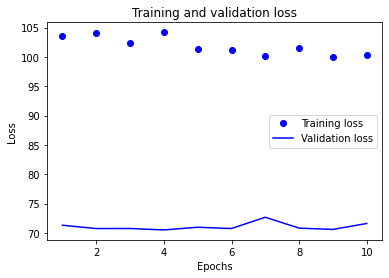

In [27]:
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Load the weights. THIS REQUIRES FIRST CREATING THE LOGIC.
ImageOnlyModel.load_weights('checkpoints/ImageOnlyModel.04-70.51.h5')

In [29]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = ImageOnlyModel.predict(test_generator)

In [30]:
output=output.reshape(-1)

In [31]:
output

array([16.368103, 13.436215,  5.606734, ..., 11.200136,  8.997895,
        4.753299], dtype=float32)

In [32]:
output_rn=output

In [33]:
def mean_square_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.square((y_true - y_pred)))

In [34]:
mse = mean_square_error(test_generator.labels, output_rn)
print('The mean square error over the test is',  mse)

The mean square error over the test is 72.22930242077605


In [54]:
ImageOnlyModel.save('resnet5.h5')

C:\Users\zhyim\anaconda3\envs\gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


### VGG 16

In [484]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights = 'imagenet',      # The weights from the ImageNet competition
              include_top = False,       # Do not include the top layer, which classifies.
              input_shape= (224, 224, 3) # Input shape. Three channels, and BGR (NOT RGB!!!)
             )

In [485]:
# Create new model
CBModel = Sequential()

# Copy the layers to our new model. This needs to be done as there is a bug in Keras.
for layer in model.layers:
    CBModel.add(layer)

# Set the layers as untrainable
for layer in CBModel.layers:
    layer.trainable = False

In [486]:
CBModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [487]:
# Set layer as trainable.
CBModel.layers[15].trainable = True
CBModel.layers[16].trainable = True

In [488]:
# We now add the new layers for prediction.
CBModel.add(Flatten(input_shape=model.output_shape[1:]))
CBModel.add(Dense(128, activation = 'relu'))
CBModel.add(Dropout(0.6))
CBModel.add(Dense(128, activation = 'relu'))
CBModel.add(Dropout(0.6))
CBModel.add(Dense(1, activation = 'linear'))

In [489]:
CBModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [490]:
# Compiling the model!
import tensorflow.keras as keras
opt = optimizers.Adam(learning_rate=1e-6,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-4 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
CBModel.compile(loss=keras.losses.MeanSquaredError(), # This is NOT a binary problem!
              optimizer=opt
              )

In [491]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
train_datagen = ImageDataGenerator(
                                  rescale=1./255,                         # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=True,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # ResNet expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=1./255,                        # Inputs are scaled in the preprocessing function
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  )

train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',  # Look from root directory
                                                    x_col='path',   # Path to images
                                                    y_col='education',  # Target
                                                    target_size=target_size, # Same as last lab
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(train,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col='education',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = test_datagen.flow_from_dataframe(test,
                                                  directory='.',
                                                  x_col='path',
                                                  y_col='education',
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='raw',
                                                  interpolation="bilinear"
                                                  )

Found 20565 validated image filenames.
Found 5141 validated image filenames.
Found 11017 validated image filenames.


In [492]:
checkpoint_path='checkpoints_vgg/CBModel.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)

my_callbacks_vgg = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=10),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
]

In [493]:
epochs = 30

# Train!
CBModel.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            steps_per_epoch = 322, 
            validation_steps = 81,
            callbacks=my_callbacks_vgg
          )

Epoch 1/30
322/322 [==============================] - 224s 695ms/step - loss: 203.8071 - val_loss: 127.3554
Epoch 2/30
322/322 [==============================] - 212s 659ms/step - loss: 137.0545 - val_loss: 103.5761
Epoch 3/30
322/322 [==============================] - 212s 659ms/step - loss: 124.2956 - val_loss: 95.9429
Epoch 4/30
322/322 [==============================] - 212s 660ms/step - loss: 118.5699 - val_loss: 91.9918
Epoch 5/30
322/322 [==============================] - 213s 662ms/step - loss: 115.4447 - val_loss: 90.7059
Epoch 6/30
322/322 [==============================] - 213s 663ms/step - loss: 114.0791 - val_loss: 88.5652
Epoch 7/30
322/322 [==============================] - 213s 662ms/step - loss: 110.6757 - val_loss: 86.4187
Epoch 8/30
322/322 [==============================] - 213s 661ms/step - loss: 109.9115 - val_loss: 86.9535
Epoch 9/30
322/322 [==============================] - 213s 661ms/step - loss: 110.5134 - val_loss: 85.6515
Epoch 10/30
322/322 [==============

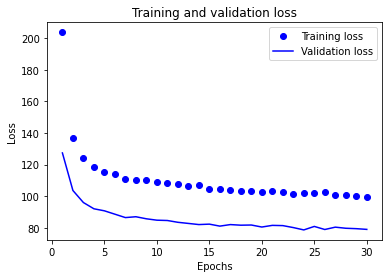

In [494]:
loss = CBModel.history.history['loss']
val_loss = CBModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

A couple more runs, just to see if it actually converges

In [495]:
epochs = 10

# Train!
CBModel.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            steps_per_epoch = 322, 
            validation_steps = 81,
            callbacks=my_callbacks_vgg
          )

Epoch 1/10
322/322 [==============================] - 213s 663ms/step - loss: 99.6615 - val_loss: 79.3151
Epoch 2/10
322/322 [==============================] - 213s 661ms/step - loss: 98.8862 - val_loss: 79.9661
Epoch 3/10
322/322 [==============================] - 213s 661ms/step - loss: 98.9745 - val_loss: 79.3704
Epoch 4/10
322/322 [==============================] - 213s 661ms/step - loss: 98.7662 - val_loss: 78.5695
Epoch 5/10
322/322 [==============================] - 213s 661ms/step - loss: 99.6219 - val_loss: 78.4540
Epoch 6/10
322/322 [==============================] - 213s 661ms/step - loss: 98.5947 - val_loss: 78.4826
Epoch 7/10
322/322 [==============================] - 213s 662ms/step - loss: 98.9475 - val_loss: 78.4304
Epoch 8/10
322/322 [==============================] - 213s 661ms/step - loss: 97.8242 - val_loss: 79.5955
Epoch 9/10
322/322 [==============================] - 214s 664ms/step - loss: 97.6488 - val_loss: 78.4841
Epoch 10/10
322/322 [=========================

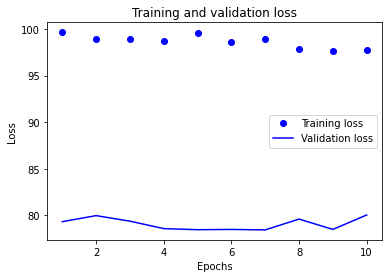

In [496]:
loss = CBModel.history.history['loss']
val_loss = CBModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [497]:
CBModel.load_weights('checkpoints_vgg/CBModel.05-78.45.h5')

In [498]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = CBModel.predict(test_generator)

In [500]:
output=output.reshape(-1)

In [501]:
mse = mean_square_error(test_generator.labels, output)
print('The mean square error over the test is',  mse)

The mean square error over the test is 82.88875452731858


In [505]:
CBModel.save('vgg_16.h5')

### GradCAM of Resnet 50

In [119]:
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    from tensorflow import keras
    import tensorflow as tf
    # First, we create a model that maps the input image to the activations
    # of the last conv layer. This layer is located at model.layers[1] as the
    # ResNet model is the first "layer" of the ImageOnlyModel. Modify as needed.
    last_conv_layer = model.layers[1].get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.layers[1].inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    regression_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = regression_input
    for layer_name in classifier_layer_names:
        try:
            x = model.get_layer(layer_name)(x)
        except:
            x = model.layers[1].get_layer(layer_name)(x)
    regression_model = keras.Model(regression_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute predictions
        top_class_channel = regression_model(last_conv_layer_output)

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the regression
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of activation
    heatmap = np.abs(np.mean(last_conv_layer_output, axis=-1))

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [120]:
output_rn

array([16.368103, 13.436215,  5.606734, ..., 11.200136,  8.997895,
        4.753299], dtype=float32)

In [121]:
test['pred']=output_rn

In [122]:
test.head(10)

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,education,path,pred,sqrerr
4463,13054,E01002608,Hounslow 028A,7a,Urban cultural mix,E02000553,Hounslow 028,E09000018,Hounslow,4a1r,Ethnically Diverse Metropolitan Living,30.429,LIDAR/LIDAR_13054.png,16.368103,197.708824
20551,51450,E01033581,Newham 037G,7a,Urban cultural mix,E02000750,Newham 037,E09000025,Newham,4a1r,Ethnically Diverse Metropolitan Living,14.175,LIDAR/LIDAR_51450.png,13.436215,0.545803
16417,13470,E01002208,Harrow 025A,3b,Asian traits,E02000457,Harrow 025,E09000015,Harrow,4a1r,Ethnically Diverse Metropolitan Living,0.645,LIDAR/LIDAR_13470.png,5.606734,24.618802
22624,17781,E01003823,Richmond upon Thames 023B,3c,Highly qualified professionals,E02000806,Richmond upon Thames 023,E09000027,Richmond upon Thames,1a1r,Rural-Urban Fringe,0.690,LIDAR/LIDAR_17781.png,9.382874,75.566050
27432,49928,E01003790,Redbridge 027A,7a,Urban cultural mix,E02000777,Redbridge 027,E09000026,Redbridge,4a1r,Ethnically Diverse Metropolitan Living,2.937,LIDAR/LIDAR_49928.png,14.268572,128.404521
13960,23157,E01000604,Brent 021E,7a,Urban cultural mix,E02000113,Brent 021,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,24.845,LIDAR/LIDAR_23157.png,18.199583,44.161566
2065,46931,E01004380,Waltham Forest 007B,3d,Households in terraces and flats,E02000901,Waltham Forest 007,E09000031,Waltham Forest,4a1r,Ethnically Diverse Metropolitan Living,15.609,LIDAR/LIDAR_46931.png,5.936450,93.558214
23850,5308,E01002414,Hillingdon 015A,1a,Cosmopolitan student neighbourhoods,E02000508,Hillingdon 015,E09000017,Hillingdon,4a1r,Ethnically Diverse Metropolitan Living,10.120,LIDAR/LIDAR_5308.png,20.519983,108.159652
12978,59940,E01000720,Bromley 019B,3d,Households in terraces and flats,E02000145,Bromley 019,E09000006,Bromley,1a1r,Rural-Urban Fringe,38.949,LIDAR/LIDAR_59940.png,16.687426,495.577694
32955,32878,E01004555,Wandsworth 017E,6a,Inner city cosmopolitan,E02000939,Wandsworth 017,E09000032,Wandsworth,5a1r,London Cosmopolitan,0.101,LIDAR/LIDAR_32878.png,8.624100,72.643229


In [123]:
test_heap=test
test_heap['sqrerr']=np.square(test_heap['pred']-test_heap['education'])
test_heap.describe()

,id,education,pred,sqrerr
count,11017.000000,11017.000000,11017.000000,1.101700e+04
mean,37050.187891,12.966379,11.923992,7.222930e+01
std,16412.411297,10.211428,5.172153,1.422877e+02
min,2619.000000,0.013000,2.007688,6.741711e-07
25%,24184.000000,4.485000,7.915950,6.133249e+00
50%,37150.000000,10.959000,11.260970,2.527343e+01
75%,50064.000000,18.963000,15.186723,7.391023e+01
max,74490.000000,57.186000,32.477901,1.816571e+03


We added two columns to the test set, one is the prediction from the resnet50v2 and the other one is our prediction error. The next thing we do is that we sort the dataframe in an ascending order by the square error within each level of education. What I mean by each level of education is we just want to makesure whole range of the index is covered. 

In [124]:
test_heap1=test_heap.loc[(test_heap['education'] <= 6) & (test_heap['education'] >= 0)]
test_heap1=test_heap1.sort_values('sqrerr')
test_heap1.iloc[0,:]

id                                              5537
LSOA11CD                                   E01002461
LSOA11NM                             Hillingdon 013A
SOAC11CD                                          3b
SOAC11NM                                Asian traits
MSOA11CD                                   E02000506
MSOA11NM                              Hillingdon 013
LAD17CD                                    E09000017
LAD17NM                                   Hillingdon
LACCD                                           4a1r
LACNM        Ethnically Diverse Metropolitan  Living
education                                      4.211
path                            LIDAR/LIDAR_5537.png
pred                                        4.211821
sqrerr                                      0.000001
Name: 5578, dtype: object

In [125]:
test_heap2=test_heap.loc[(test_heap['education'] <= 12) & (test_heap['education'] >= 6)]
test_heap2=test_heap2.sort_values('sqrerr')
test_heap2.iloc[0,:]

id                             37600
LSOA11CD                   E01003164
LSOA11NM                Lambeth 025A
SOAC11CD                          6a
SOAC11NM     Inner city cosmopolitan
MSOA11CD                   E02000642
MSOA11NM                 Lambeth 025
LAD17CD                    E09000022
LAD17NM                      Lambeth
LACCD                           5a1r
LACNM            London Cosmopolitan
education                      8.592
path           LIDAR/LIDAR_37600.png
pred                        8.593156
sqrerr                      0.000001
Name: 6002, dtype: object

In [126]:
test_heap3=test_heap.loc[(test_heap['education'] <= 18) & (test_heap['education'] >= 12)]
test_heap3=test_heap3.sort_values('sqrerr')
test_heap3.iloc[0,:]

id                                      51273
LSOA11CD                            E01000664
LSOA11NM                         Bromley 026D
SOAC11CD                                   3d
SOAC11NM     Households in terraces and flats
MSOA11CD                            E02000152
MSOA11NM                          Bromley 026
LAD17CD                             E09000006
LAD17NM                               Bromley
LACCD                                    1a1r
LACNM                      Rural-Urban Fringe
education                              15.782
path                    LIDAR/LIDAR_51273.png
pred                                15.783873
sqrerr                               0.000004
Name: 21306, dtype: object

In [127]:
test_heap4=test_heap.loc[(test_heap['education'] <= 24) & (test_heap['education'] >= 18)]
test_heap4=test_heap4.sort_values('sqrerr')
test_heap4.iloc[0,:]

id                           29206
LSOA11CD                 E01004148
LSOA11NM               Sutton 014B
SOAC11CD                        7a
SOAC11NM        Urban cultural mix
MSOA11CD                 E02000853
MSOA11NM                Sutton 014
LAD17CD                  E09000029
LAD17NM                     Sutton
LACCD                         8b1r
LACNM               City Periphery
education                   20.282
path         LIDAR/LIDAR_29206.png
pred                     20.209909
sqrerr                    0.005197
Name: 32081, dtype: object

In [128]:
test_heap5=test_heap.loc[(test_heap['education'] <= 30) & (test_heap['education'] >= 24)]
test_heap5=test_heap5.sort_values('sqrerr')
test_heap5.iloc[0,:]

id                                             48978
LSOA11CD                                   E01001709
LSOA11NM                              Greenwich 004B
SOAC11CD                                          6a
SOAC11NM                     Inner city cosmopolitan
MSOA11CD                                   E02000316
MSOA11NM                               Greenwich 004
LAD17CD                                    E09000011
LAD17NM                                    Greenwich
LACCD                                           4a1r
LACNM        Ethnically Diverse Metropolitan  Living
education                                     25.003
path                           LIDAR/LIDAR_48978.png
pred                                        25.11458
sqrerr                                       0.01245
Name: 28305, dtype: object

In [129]:
test_heap6=test_heap.loc[(test_heap['education'] <= 36) & (test_heap['education'] >= 30)]
test_heap6=test_heap6.sort_values('sqrerr')
test_heap6.iloc[0,:]

id                                             58867
LSOA11CD                                   E01000014
LSOA11NM                   Barking and Dagenham 013B
SOAC11CD                                          7a
SOAC11NM                          Urban cultural mix
MSOA11CD                                   E02000014
MSOA11NM                    Barking and Dagenham 013
LAD17CD                                    E09000002
LAD17NM                         Barking and Dagenham
LACCD                                           4a1r
LACNM        Ethnically Diverse Metropolitan  Living
education                                     31.501
path                           LIDAR/LIDAR_58867.png
pred                                       29.316751
sqrerr                                      4.770942
Name: 8703, dtype: object

In [130]:
test_heap7=test_heap.loc[(test_heap['education'] <= 42) & (test_heap['education'] >= 36)]
test_heap7=test_heap7.sort_values('sqrerr')
test_heap7.iloc[0,:]

id                                             43199
LSOA11CD                                   E01001483
LSOA11NM                                Enfield 025A
SOAC11CD                                          7a
SOAC11NM                          Urban cultural mix
MSOA11CD                                   E02000301
MSOA11NM                                 Enfield 025
LAD17CD                                    E09000010
LAD17NM                                      Enfield
LACCD                                           4a1r
LACNM        Ethnically Diverse Metropolitan  Living
education                                     37.806
path                           LIDAR/LIDAR_43199.png
pred                                       30.036791
sqrerr                                     60.360611
Name: 20524, dtype: object

In [131]:
test_heap8=test_heap.loc[(test_heap['education'] <= 48) & (test_heap['education'] >= 42)]
test_heap8=test_heap8.sort_values('sqrerr')
test_heap8.iloc[0,:]

id                                              7308
LSOA11CD                                   E01002548
LSOA11NM                             Hillingdon 025A
SOAC11CD                                          7a
SOAC11NM                          Urban cultural mix
MSOA11CD                                   E02000518
MSOA11NM                              Hillingdon 025
LAD17CD                                    E09000017
LAD17NM                                   Hillingdon
LACCD                                           4a1r
LACNM        Ethnically Diverse Metropolitan  Living
education                                     42.224
path                            LIDAR/LIDAR_7308.png
pred                                       25.385851
sqrerr                                    283.523265
Name: 16764, dtype: object

In [132]:
test_heap9=test_heap.loc[(test_heap['education'] <= 54) & (test_heap['education'] >= 48)]
test_heap9=test_heap9.sort_values('sqrerr')
test_heap9.iloc[0,:]

id                             59584
LSOA11CD                   E01002325
LSOA11NM               Havering 011C
SOAC11CD                          4c
SOAC11NM     Hampered neighbourhoods
MSOA11CD                   E02000474
MSOA11NM                Havering 011
LAD17CD                    E09000016
LAD17NM                     Havering
LACCD                           8b1r
LACNM                 City Periphery
education                     49.585
path           LIDAR/LIDAR_59584.png
pred                       30.574722
sqrerr                    361.390659
Name: 14387, dtype: object

In [133]:
test_heap10=test_heap.loc[(test_heap['education'] <= 60) & (test_heap['education'] >= 54)]
test_heap10=test_heap10.sort_values('sqrerr')
test_heap10.iloc[0,:]

id                                             41692
LSOA11CD                                   E01001517
LSOA11NM                                Enfield 006C
SOAC11CD                                          7a
SOAC11NM                          Urban cultural mix
MSOA11CD                                   E02000282
MSOA11NM                                 Enfield 006
LAD17CD                                    E09000010
LAD17NM                                      Enfield
LACCD                                           4a1r
LACNM        Ethnically Diverse Metropolitan  Living
education                                     57.186
path                           LIDAR/LIDAR_41692.png
pred                                       21.552549
sqrerr                                   1269.742804
Name: 8269, dtype: object

In [134]:
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Get the image in the right size
def get_img_array(img_path, size = (224, 224)):
    import tensorflow as tf
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    array = preprocess_input(array)
    return array

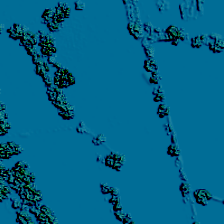

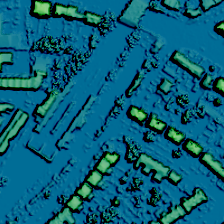

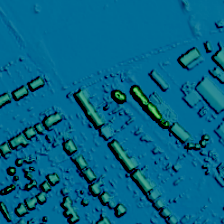

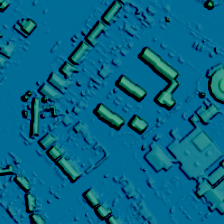

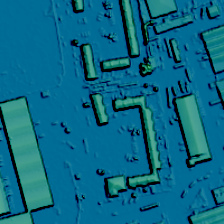

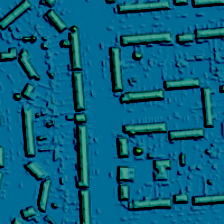

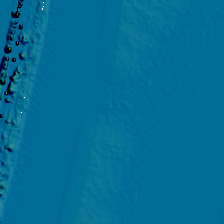

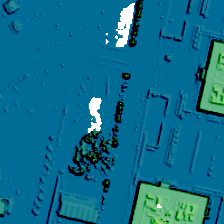

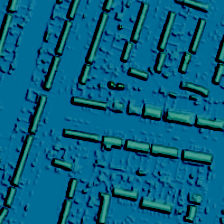

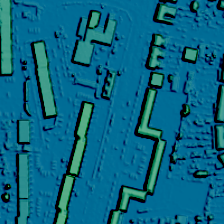

In [135]:
img_path_1 = test_heap1.iloc[0,-3]
img_path_2 = test_heap2.iloc[0,-3]
img_path_3 = test_heap3.iloc[0,-3]
img_path_4 = test_heap4.iloc[0,-3]
img_path_5 = test_heap5.iloc[0,-3]
img_path_6 = test_heap6.iloc[0,-3]
img_path_7 = test_heap7.iloc[0,-3]
img_path_8 = test_heap8.iloc[0,-3]
img_path_9 = test_heap9.iloc[0,-3]
img_path_10 = test_heap10.iloc[0,-3]
p1 = get_img_array(img_path_1)
p2 = get_img_array(img_path_2)
p3 = get_img_array(img_path_3)
p4 = get_img_array(img_path_4)
p5 = get_img_array(img_path_5)
p6 = get_img_array(img_path_6)
p7 = get_img_array(img_path_7)
p8 = get_img_array(img_path_8)
p9 = get_img_array(img_path_9)
p10 = get_img_array(img_path_10)
display(Image(img_path_1))
display(Image(img_path_2))
display(Image(img_path_3))
display(Image(img_path_4))
display(Image(img_path_5))
display(Image(img_path_6))
display(Image(img_path_7))
display(Image(img_path_8))
display(Image(img_path_9))
display(Image(img_path_10))

In [136]:
# Set the layers.
last_conv_layer_name = "conv5_block3_out"
classifier_layer_names =  ["flatten",
                           "dense",
                           "dropout",
                           "dense_1",
                           "dropout_1",
                           "dense_2"]

In [137]:
color_map = plt.cm.get_cmap('hot')

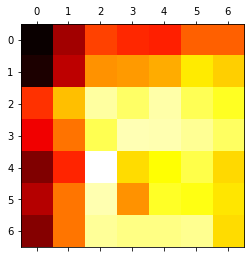

In [138]:
heatmap1 = make_gradcam_heatmap(
    preprocess_input(p1), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap1, cmap=color_map.reversed())
plt.show()

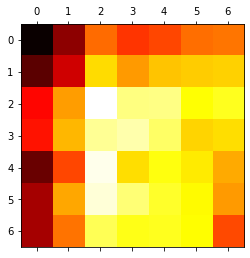

In [139]:
heatmap2 = make_gradcam_heatmap(
    preprocess_input(p2), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap2, cmap=color_map.reversed())
plt.show()

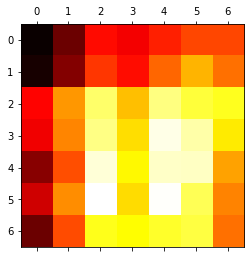

In [140]:
heatmap3 = make_gradcam_heatmap(
    preprocess_input(p3), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap3, cmap=color_map.reversed())
plt.show()

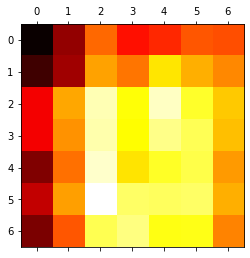

In [141]:
heatmap4 = make_gradcam_heatmap(
    preprocess_input(p4), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap4, cmap=color_map.reversed())
plt.show()

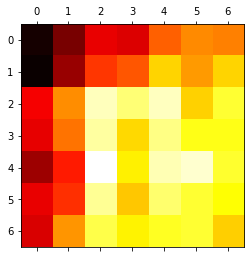

In [142]:
heatmap5 = make_gradcam_heatmap(
    preprocess_input(p5), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap5, cmap=color_map.reversed())
plt.show()

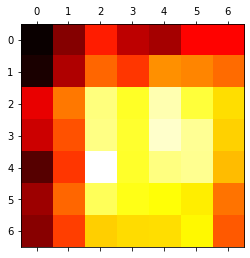

In [143]:
heatmap6 = make_gradcam_heatmap(
    preprocess_input(p6), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap6, cmap=color_map.reversed())
plt.show()

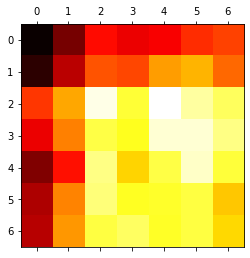

In [144]:
heatmap7 = make_gradcam_heatmap(
    preprocess_input(p7), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap7, cmap=color_map.reversed())
plt.show()

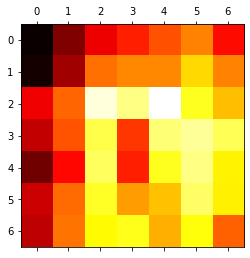

In [145]:
heatmap8 = make_gradcam_heatmap(
    preprocess_input(p8), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap8, cmap=color_map.reversed())
plt.show()

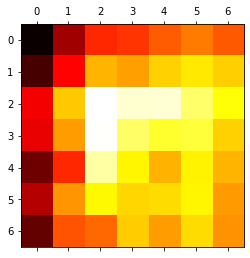

In [146]:
heatmap9 = make_gradcam_heatmap(
    preprocess_input(p9), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap9, cmap=color_map.reversed())
plt.show()

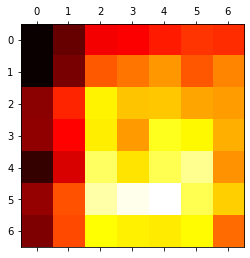

In [147]:
heatmap10 = make_gradcam_heatmap(
    preprocess_input(p10), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap10, cmap=color_map.reversed())
plt.show()

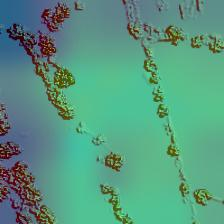

In [148]:
img = keras.preprocessing.image.load_img(img_path_1)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap1 = np.uint8(255 * heatmap1)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap1]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "1.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

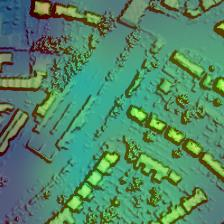

In [149]:
img = keras.preprocessing.image.load_img(img_path_2)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap2 = np.uint8(255 * heatmap2)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap2]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "2.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

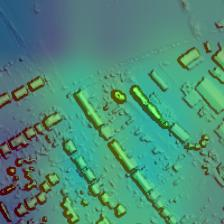

In [150]:
img = keras.preprocessing.image.load_img(img_path_3)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap3 = np.uint8(255 * heatmap3)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap3]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "3.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

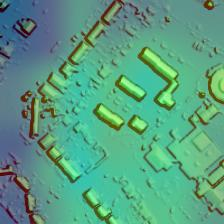

In [151]:
img = keras.preprocessing.image.load_img(img_path_4)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap4 = np.uint8(255 * heatmap4)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap4]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "4.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

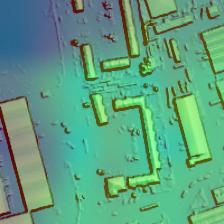

In [152]:
img = keras.preprocessing.image.load_img(img_path_5)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap5 = np.uint8(255 * heatmap5)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap5]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "5.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

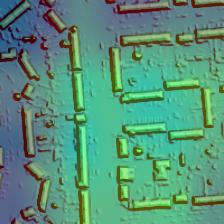

In [153]:
img = keras.preprocessing.image.load_img(img_path_6)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap6 = np.uint8(255 * heatmap6)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap6]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "6.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

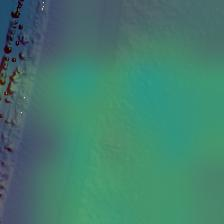

In [154]:
img = keras.preprocessing.image.load_img(img_path_7)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap7 = np.uint8(255 * heatmap7)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap7]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "7.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

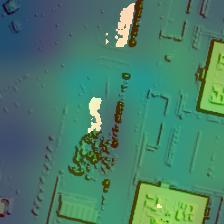

In [155]:
img = keras.preprocessing.image.load_img(img_path_8)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap8 = np.uint8(255 * heatmap8)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap8]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "8.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

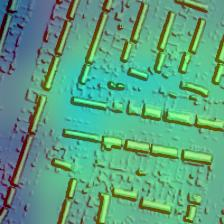

In [156]:
img = keras.preprocessing.image.load_img(img_path_9)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap9 = np.uint8(255 * heatmap9)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap9]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "9.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

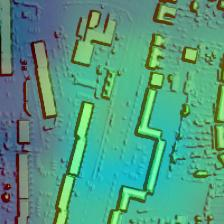

In [157]:
img = keras.preprocessing.image.load_img(img_path_10)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap10 = np.uint8(255 * heatmap10)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap10]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "10.jpg"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))

### Multimodal Modal

In [165]:
data = pd.read_csv('EmbeddingData_C3_9528.csv')
#ImagePath = 'LIDAR/'
#data['path'] = [os.path.join(ImagePath, 'LIDAR_'+str(i) + '.png') for i in data['id']]
data=data.drop(columns=['LSOA11NM','SOAC11NM','MSOA11NM','LAD17NM','LACNM'])
data.head()
data.describe(include='all')

,id,LSOA11CD,SOAC11CD,MSOA11CD,LAD17CD,LACCD,income,employment,education,health,crime,barriers,living_environment
count,36723.000000,36723,36723,36723,36723,36723,36723.000000,36723.000000,36723.000000,36723.000000,36723.000000,36723.000000,36723.000000
unique,NaN,4748,15,979,33,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E01001412,6a,E02006789,E09000006,4a1r,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,363,9041,462,3546,19492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36922.291997,NaN,NaN,NaN,NaN,NaN,0.117011,0.077774,12.995546,-0.578348,0.211408,32.301551,25.645519
std,16424.963636,NaN,NaN,NaN,NaN,NaN,0.072170,0.043844,10.240666,0.718902,0.588681,10.587134,10.729679
min,2619.000000,NaN,NaN,NaN,NaN,NaN,0.006000,0.003000,0.013000,-3.215000,-2.354000,6.910000,5.450000
25%,24161.500000,NaN,NaN,NaN,NaN,NaN,0.057000,0.043000,4.481000,-1.089000,-0.199000,24.283000,17.527000
50%,37072.000000,NaN,NaN,NaN,NaN,NaN,0.103000,0.067000,10.925000,-0.563000,0.221000,31.270000,24.350000
75%,50001.500000,NaN,NaN,NaN,NaN,NaN,0.163000,0.102000,19.086000,-0.039000,0.627000,39.506000,31.997000


In [166]:
train, test = train_test_split(data, 
                               test_size = 0.3,
                               random_state = 251238783)

In [167]:
train.describe(include="all")

,id,LSOA11CD,SOAC11CD,MSOA11CD,LAD17CD,LACCD,income,employment,education,health,crime,barriers,living_environment
count,25706.00000,25706,25706,25706,25706,25706,25706.000000,25706.000000,25706.000000,25706.000000,25706.000000,25706.000000,25706.000000
unique,NaN,4613,15,978,33,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E01001412,6a,E02000524,E09000006,4a1r,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,265,6364,314,2455,13663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36867.47876,NaN,NaN,NaN,NaN,NaN,0.117431,0.078008,13.008047,-0.574609,0.213654,32.341602,25.672782
std,16430.35467,NaN,NaN,NaN,NaN,NaN,0.072186,0.043964,10.253343,0.718528,0.590020,10.567282,10.728953
min,2867.00000,NaN,NaN,NaN,NaN,NaN,0.006000,0.003000,0.013000,-3.215000,-2.354000,6.910000,5.450000
25%,24147.25000,NaN,NaN,NaN,NaN,NaN,0.058000,0.043000,4.480250,-1.076000,-0.196000,24.299000,17.556000
50%,37037.50000,NaN,NaN,NaN,NaN,NaN,0.104000,0.068000,10.876000,-0.559000,0.227000,31.284000,24.358000
75%,49971.75000,NaN,NaN,NaN,NaN,NaN,0.164000,0.102000,19.152000,-0.036000,0.633000,39.547000,31.997000


In [168]:
test.describe(include="all")

,id,LSOA11CD,SOAC11CD,MSOA11CD,LAD17CD,LACCD,income,employment,education,health,crime,barriers,living_environment
count,11017.000000,11017,11017,11017,11017,11017,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
unique,NaN,3749,15,973,33,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E01001412,6a,E02006789,E09000006,4a1r,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,98,2677,149,1091,5829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37050.187891,NaN,NaN,NaN,NaN,NaN,0.116032,0.077228,12.966379,-0.587071,0.206168,32.208100,25.581907
std,16412.411297,NaN,NaN,NaN,NaN,NaN,0.072127,0.043559,10.211428,0.719730,0.585538,10.633204,10.731591
min,2619.000000,NaN,NaN,NaN,NaN,NaN,0.006000,0.003000,0.013000,-3.215000,-2.354000,6.910000,5.450000
25%,24184.000000,NaN,NaN,NaN,NaN,NaN,0.056000,0.043000,4.485000,-1.099000,-0.208000,24.197000,17.369000
50%,37150.000000,NaN,NaN,NaN,NaN,NaN,0.102000,0.066000,10.959000,-0.572000,0.209000,31.206000,24.319000
75%,50064.000000,NaN,NaN,NaN,NaN,NaN,0.162000,0.102000,18.963000,-0.055000,0.622000,39.399000,31.998000


In [169]:
# Import preprocessors
from sklearn.preprocessing import MinMaxScaler

# What are the continous variables?
continousCols = ["income", "employment", "health", "crime", "barriers", "living_environment"]

# Define scaler and train it over the train set.
Scaler = MinMaxScaler()
Scaler.fit(train[continousCols])

MinMaxScaler()

In [170]:
# Apply over sets. Ignore warning.
train[continousCols] = Scaler.transform(train[continousCols])
test[continousCols] = Scaler.transform(test[continousCols])

In [171]:
train['LSOA11CD']=train.loc[:,'LSOA11CD'].str.upper()
lsoa_idx = train.groupby(['LSOA11CD'])['education'].mean().sort_values()
lsoa_idx.count()

4613

In [172]:
for i in train.index:
    if train.loc[i,'LSOA11CD'] in lsoa_idx.index[:500]:
        train.loc[i,'LSOA11CD']='9'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[500:1000]:
        train.loc[i,'LSOA11CD']='8'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[1000:1500]:
        train.loc[i,'LSOA11CD']='7'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[1500:2000]:
        train.loc[i,'LSOA11CD']='6'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[2000:2500]:
        train.loc[i,'LSOA11CD']='5'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[2500:3000]:
        train.loc[i,'LSOA11CD']='4'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[3000:3500]:
        train.loc[i,'LSOA11CD']='3'
    elif train.loc[i,'LSOA11CD'] in lsoa_idx.index[3500:4000]:
        train.loc[i,'LSOA11CD']='2'
    else:
        train.loc[i,'LSOA11CD']='1'

train.loc[:,'LSOA11CD']=train.loc[:,'LSOA11CD'].astype(str)

In [173]:
for i in test.index:
    if test.loc[i,'LSOA11CD'] in lsoa_idx.index[:500]:
        test.loc[i,'LSOA11CD']='9'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[500:1000]:
        test.loc[i,'LSOA11CD']='8'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[1000:1500]:
        test.loc[i,'LSOA11CD']='7'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[1500:2000]:
        test.loc[i,'LSOA11CD']='6'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[2000:2500]:
        test.loc[i,'LSOA11CD']='5'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[2500:3000]:
        test.loc[i,'LSOA11CD']='4'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[3000:3500]:
        test.loc[i,'LSOA11CD']='3'
    elif test.loc[i,'LSOA11CD'] in lsoa_idx.index[3500:4000]:
        test.loc[i,'LSOA11CD']='2'
    else:
        test.loc[i,'LSOA11CD']='1'

test.loc[:,'LSOA11CD']=test.loc[:,'LSOA11CD'].astype(str)

In [174]:
train['SOAC11CD']=train.loc[:,'SOAC11CD'].str.upper()
soac_idx = train.groupby(['SOAC11CD'])['education'].mean().sort_values()
soac_idx.count()
soac_idx

SOAC11CD
3C     3.295350
3B     6.439260
8A     8.228385
1A     8.618364
6A     9.763907
8B    11.014596
3A    11.527715
7B    13.666861
5C    13.896471
5B    14.267000
8C    16.532806
3D    18.619842
7A    21.318783
5A    37.303000
4C    39.129528
Name: education, dtype: float64

In [175]:
for i in train.index:
    if train.loc[i,'SOAC11CD'] in soac_idx.index[:5]:
        train.loc[i,'SOAC11CD']='3'
    elif train.loc[i,'SOAC11CD'] in soac_idx.index[5:10]:
        train.loc[i,'SOAC11CD']='2'
    else:
        train.loc[i,'SOAC11CD']='1'

train.loc[:,'SOAC11CD']=train.loc[:,'SOAC11CD'].astype(str)

In [176]:
test['SOAC11CD']=test.loc[:,'SOAC11CD'].str.upper()
for i in test.index:
    if test.loc[i,'SOAC11CD'] in soac_idx.index[:5]:
        test.loc[i,'SOAC11CD']='3'
    elif test.loc[i,'SOAC11CD'] in soac_idx.index[5:10]:
        test.loc[i,'SOAC11CD']='2'
    else:
        test.loc[i,'SOAC11CD']='1'

test.loc[:,'SOAC11CD']=test.loc[:,'SOAC11CD'].astype(str)

In [177]:
train['MSOA11CD']=train.loc[:,'MSOA11CD'].str.upper()
msoa_idx = train.groupby(['MSOA11CD'])['education'].mean().sort_values()
msoa_idx.count()

978

In [178]:
for i in train.index:
    if train.loc[i,'MSOA11CD'] in msoa_idx.index[:200]:
        train.loc[i,'MSOA11CD']='5'
    elif train.loc[i,'MSOA11CD'] in msoa_idx.index[200:400]:
        train.loc[i,'MSOA11CD']='4'
    elif train.loc[i,'MSOA11CD'] in msoa_idx.index[400:600]:
        train.loc[i,'MSOA11CD']='3'
    elif train.loc[i,'MSOA11CD'] in msoa_idx.index[600:800]:
        train.loc[i,'MSOA11CD']='2'
    else:
        train.loc[i,'MSOA11CD']='1'

train.loc[:,'MSOA11CD']=train.loc[:,'MSOA11CD'].astype(str)

In [179]:
test['MSOA11CD']=test.loc[:,'MSOA11CD'].str.upper()
for i in test.index:
    if test.loc[i,'MSOA11CD'] in msoa_idx.index[:200]:
        test.loc[i,'MSOA11CD']='5'
    elif test.loc[i,'MSOA11CD'] in msoa_idx.index[200:400]:
        test.loc[i,'MSOA11CD']='4'
    elif test.loc[i,'MSOA11CD'] in msoa_idx.index[400:600]:
        test.loc[i,'MSOA11CD']='3'
    elif test.loc[i,'MSOA11CD'] in msoa_idx.index[600:800]:
        test.loc[i,'MSOA11CD']='2'
    else:
        test.loc[i,'MSOA11CD']='1'

test.loc[:,'MSOA11CD']=test.loc[:,'MSOA11CD'].astype(str)

In [181]:
train['LAD17CD']=train.loc[:,'LAD17CD'].str.upper()
lad_idx = train.groupby(['LAD17CD'])['education'].mean().sort_values()
lad_idx.count()

33

In [182]:
for i in train.index:
    if train.loc[i,'LAD17CD'] in lad_idx.index[:5]:
        train.loc[i,'LAD17CD']='6'
    elif train.loc[i,'LAD17CD'] in lad_idx.index[5:10]:
        train.loc[i,'LAD17CD']='5'
    elif train.loc[i,'LAD17CD'] in lad_idx.index[10:15]:
        train.loc[i,'LAD17CD']='4'
    elif train.loc[i,'LAD17CD'] in lad_idx.index[15:20]:
        train.loc[i,'LAD17CD']='3'
    elif train.loc[i,'LAD17CD'] in lad_idx.index[20:25]:
        train.loc[i,'LAD17CD']='2'
    else:
        train.loc[i,'LAD17CD']='1'

train.loc[:,'LAD17CD']=train.loc[:,'LAD17CD'].astype(str)

In [183]:
test['LAD17CD']=test.loc[:,'LAD17CD'].str.upper()
for i in test.index:
    if test.loc[i,'LAD17CD'] in lad_idx.index[:5]:
        test.loc[i,'LAD17CD']='6'
    elif test.loc[i,'LAD17CD'] in lad_idx.index[5:10]:
        test.loc[i,'LAD17CD']='5'
    elif test.loc[i,'LAD17CD'] in lad_idx.index[10:15]:
        test.loc[i,'LAD17CD']='4'
    elif test.loc[i,'LAD17CD'] in lad_idx.index[15:20]:
        test.loc[i,'LAD17CD']='3'
    elif test.loc[i,'LAD17CD'] in lad_idx.index[20:25]:
        test.loc[i,'LAD17CD']='2'
    else:
        test.loc[i,'LAD17CD']='1'

test.loc[:,'LAD17CD']=test.loc[:,'LAD17CD'].astype(str)

In [185]:
train_dm=pd.get_dummies(train,drop_first=True)
test_dm=pd.get_dummies(test,drop_first=True)

In [188]:
ImagePath = 'LIDAR/'
train_dm['path'] = [os.path.join(ImagePath, 'LIDAR_'+str(i) + '.png') for i in train_dm['id']]
test_dm['path'] = [os.path.join(ImagePath, 'LIDAR_'+str(i) + '.png') for i in test_dm['id']]

In [214]:
image_input = tf.keras.Input(shape=ImageSize + (3,),
                             name = 'image_input')

# Load an empty ResNet
resnet_input = ResNet50V2(weights = 'imagenet',     # The weights from the ImageNet competition
                      include_top = False,       # Do not include the top layer, which classifies.
                      input_shape= (224, 224, 3) # Input shape. Three channels.
                      )
resnet_input.trainable = False

# Use the model API to attach it to our input layer.
ImageClassifier = resnet_input(image_input, training=False)

# Add a Flatten layer with the model API.
ImageClassifier = Flatten()(ImageClassifier)

# Now we create the structured data layer.
predictive_features = 6 + 23 # six regular, 23 categorical
features_input  = keras.Input(shape=(predictive_features,),
                              name="structured_data") 
Structured =  Dense( 64, activation = 'relu' )(features_input) # Add one processing layer
Structured =  Dropout(0.6)(Structured)   # Dropout after  Dense
Structured =  Dense( 32, activation = 'relu' )(Structured)
Structured =  Dropout(0.6)(Structured)   # Dropout after  Dense

# Merge all available features into a single large vector via concatenation
merged = concatenate([ImageClassifier, Structured])

# Add a few prediction layers
merged = Dense(128, activation='relu')(merged)
merged = Dropout(0.6)(merged)
merged = Dense(128, activation='relu')(merged)
merged = Dropout(0.6)(merged)

educationd = Dense(1, activation='relu', name="educationd")(merged)

# Instantiate an end-to-end model predicting house_prices
multimodal_model = keras.Model(inputs=[image_input, features_input], 
                               outputs=[educationd])

In [215]:
multimodal_model.compile(optimizer = opt,
                    loss='mean_squared_error')

In [198]:
train_dm.columns

Index(['id', 'income', 'employment', 'education', 'health', 'crime',
       'barriers', 'living_environment', 'LSOA11CD_2', 'LSOA11CD_3',
       'LSOA11CD_4', 'LSOA11CD_5', 'LSOA11CD_6', 'LSOA11CD_7', 'LSOA11CD_8',
       'LSOA11CD_9', 'SOAC11CD_2', 'SOAC11CD_3', 'MSOA11CD_2', 'MSOA11CD_3',
       'MSOA11CD_4', 'MSOA11CD_5', 'LAD17CD_2', 'LAD17CD_3', 'LAD17CD_4',
       'LAD17CD_5', 'LAD17CD_6', 'LACCD_2b1r', 'LACCD_4a1r', 'LACCD_5a1r',
       'LACCD_8b1r', 'path'],
      dtype='object')

In [211]:
pred_cols = np.r_[1:(train_dm.columns.shape[0]-1)]

train_dm.columns[pred_cols]

Index(['income', 'employment', 'education', 'health', 'crime', 'barriers',
       'living_environment', 'LSOA11CD_2', 'LSOA11CD_3', 'LSOA11CD_4',
       'LSOA11CD_5', 'LSOA11CD_6', 'LSOA11CD_7', 'LSOA11CD_8', 'LSOA11CD_9',
       'SOAC11CD_2', 'SOAC11CD_3', 'MSOA11CD_2', 'MSOA11CD_3', 'MSOA11CD_4',
       'MSOA11CD_5', 'LAD17CD_2', 'LAD17CD_3', 'LAD17CD_4', 'LAD17CD_5',
       'LAD17CD_6', 'LACCD_2b1r', 'LACCD_4a1r', 'LACCD_5a1r', 'LACCD_8b1r'],
      dtype='object')

In [216]:
# Define parameters

target_size = (224, 224)
batch_size = 64

# What are the useful columns? Note the position of the target. 
pred_cols = np.r_[1:(train_dm.columns.shape[0]-1)]

# We only modify the generators. Note the y vector.
train_generator = train_datagen.flow_from_dataframe(train_dm,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col=train_dm.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='training',
                                                    interpolation="bilinear"
                                                   )

validation_generator = train_datagen.flow_from_dataframe(train_dm,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col=train_dm.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    class_mode='raw',
                                                    subset='validation',
                                                    interpolation="bilinear"
                                                   )

test_generator = test_datagen.flow_from_dataframe(test_dm,
                                                    directory='.',
                                                    x_col='path',
                                                    y_col=test_dm.columns[pred_cols],
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='raw',
                                                    interpolation="bilinear"
                                                   )

# Define combined generator
def train_generator_func():
    count = 0

    while True:
        if  count == len(train_dm.index):
            train_generator.reset()
            break
        count += 1
        data = train_generator.next()

        # Let's identify where is what.
        target_location = 2
        predictive_columns = np.r_[0:2,3:30]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets


def validation_generator_func():
    count = 0
    while True:
        if count == len(train_dm.index):
            validation_generator.reset()
            break
        count += 1
        data = validation_generator.next()

        # Let's identify where is what.
        target_location = 2
        predictive_columns = np.r_[0:2,3:30]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets
        
        
def test_generator_func():
    count = 0
    test_generator.reset()
    while True:
        if count == len(test_dm.index):
            test_generator.reset()
            break
        count += 1
        data = test_generator.next()

        # Let's identify where is what.
        target_location = 2
        predictive_columns = np.r_[0:2,3:30]

        # Now we reshape everything. First the images.
        imgs = data[0]
        # Now we need to extract which ones are the predictive variables.
        cols = data[1][:, predictive_columns]
        # Finally we need the targets.
        targets = data[1][:, target_location]
        yield [imgs, cols], targets

Found 20565 validated image filenames.
Found 5141 validated image filenames.
Found 11017 validated image filenames.


In [217]:
# Warmup
# Steps and epochs
epochs=5
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = np.amax([validation_generator.samples // validation_generator.batch_size, 1])

# Train!
multimodal_model.fit(train_generator_func(),
                      epochs=epochs,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps
                     )

Epoch 1/5
321/321 [==============================] - 223s 689ms/step - loss: 129.5982 - val_loss: 86.8923
Epoch 2/5
321/321 [==============================] - 214s 670ms/step - loss: 116.3622 - val_loss: 83.7161
Epoch 3/5
321/321 [==============================] - 215s 673ms/step - loss: 112.0581 - val_loss: 83.4807
Epoch 4/5
321/321 [==============================] - 215s 673ms/step - loss: 110.9337 - val_loss: 82.3978
Epoch 5/5
321/321 [==============================] - 215s 671ms/step - loss: 107.8758 - val_loss: 81.0652


In [218]:
# Set it as trainable
resnet_input.trainable = True

# Recompile
multimodal_model.compile(optimizer = opt,
                    loss='mean_squared_error')

# Define callbacks
checkpoint_path='checkpoints/MultimodalModel{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)

my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                     min_delta=0.000001,
                                     patience=10),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True,
                                       monitor='val_loss'
                                       ),
]

# Steps and epochs
epochs=30
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = np.amax([validation_generator.samples // validation_generator.batch_size, 1])

# Train!
multimodal_model.fit(train_generator_func(),
                      epochs=epochs,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps,
                     callbacks=my_callbacks
                     )

Epoch 1/30
321/321 [==============================] - 224s 685ms/step - loss: 107.9890 - val_loss: 75.3626
Epoch 2/30
321/321 [==============================] - 218s 681ms/step - loss: 100.0041 - val_loss: 72.8427
Epoch 3/30
321/321 [==============================] - 218s 680ms/step - loss: 97.2551 - val_loss: 81.1636
Epoch 4/30
321/321 [==============================] - 218s 681ms/step - loss: 94.3831 - val_loss: 73.9445
Epoch 5/30
321/321 [==============================] - 218s 679ms/step - loss: 92.9163 - val_loss: 70.9979
Epoch 6/30
321/321 [==============================] - 217s 678ms/step - loss: 90.5485 - val_loss: 68.9348
Epoch 7/30
321/321 [==============================] - 217s 677ms/step - loss: 90.1127 - val_loss: 74.1925
Epoch 8/30
321/321 [==============================] - 217s 677ms/step - loss: 87.2976 - val_loss: 71.0103
Epoch 9/30
321/321 [==============================] - 217s 678ms/step - loss: 86.1566 - val_loss: 67.9952
Epoch 10/30
321/321 [=======================

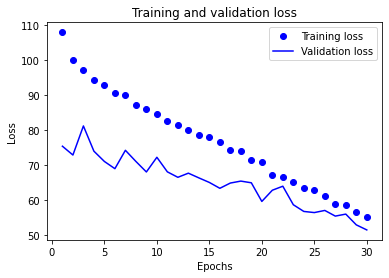

In [219]:
loss = multimodal_model.history.history['loss']
val_loss = multimodal_model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [220]:
epochs=30

multimodal_model.fit(train_generator_func(),
                      epochs=epochs,
                      steps_per_epoch=steps_per_epoch,
                      validation_data=validation_generator_func(),
                      validation_steps=validation_steps,
                     callbacks=my_callbacks
                     )

Epoch 1/30
321/321 [==============================] - 218s 681ms/step - loss: 53.7703 - val_loss: 51.3793
Epoch 2/30
321/321 [==============================] - 218s 681ms/step - loss: 53.0003 - val_loss: 50.6147
Epoch 3/30
321/321 [==============================] - 217s 679ms/step - loss: 51.5544 - val_loss: 50.8046
Epoch 4/30
321/321 [==============================] - 217s 679ms/step - loss: 50.7424 - val_loss: 47.9961
Epoch 5/30
321/321 [==============================] - 218s 680ms/step - loss: 49.7398 - val_loss: 49.7609
Epoch 6/30
321/321 [==============================] - 217s 679ms/step - loss: 47.8083 - val_loss: 47.8082
Epoch 7/30
321/321 [==============================] - 218s 679ms/step - loss: 47.7674 - val_loss: 46.2161
Epoch 8/30
321/321 [==============================] - 218s 680ms/step - loss: 45.7619 - val_loss: 45.2265
Epoch 9/30
321/321 [==============================] - 217s 677ms/step - loss: 46.7828 - val_loss: 45.9864
Epoch 10/30
321/321 [=========================

In [222]:
multimodal_model.load_weights('checkpoints/MultimodalModel29-36.04.h5')

In [223]:
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

pred_test = multimodal_model.predict(test_generator_func(),
                                    steps=STEP_SIZE_TEST+1,
                                    verbose=1)

173/173 [==============================] - 26s 146ms/step


In [225]:
pred_t=pred_test.reshape(-1)

In [230]:
mse = mean_square_error(test_generator.labels[:,2], pred_t)
print('The mean squared error over the test is', mse)

The mean squared error over the test is 37.96041517941781
